In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
usecols = [
    'room_type', 'neighbourhood_group',
    'latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [7]:
df = pd.read_csv('AB_NYC_2019.csv', usecols= usecols)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [9]:
df.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df['reviews_per_month'] = df.reviews_per_month.fillna(0)

# Q1
What is the most frequent observation (mode) for the column 'neighbourhood_group'?



In [13]:
df['neighbourhood_group'].mode()

0    Manhattan
Name: neighbourhood_group, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_class = df.copy()

In [16]:
mean = df_class['price'].mean()

df_class['above_average'] = np.where(df_class['price']>=mean,1,0)

In [18]:
df_class = df_class.drop('price', axis=1)

In [19]:
df_class.head(10)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,1
2,Manhattan,40.80902,-73.94190,Private room,3,0,0.00,1,365,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,3,74,0.59,1,129,1
6,Brooklyn,40.68688,-73.95596,Private room,45,49,0.40,1,0,0
7,Manhattan,40.76489,-73.98493,Private room,2,430,3.47,1,220,0
8,Manhattan,40.80178,-73.96723,Private room,2,118,0.99,1,0,0
9,Manhattan,40.71344,-73.99037,Entire home/apt,1,160,1.33,4,188,0


In [21]:
df_train_full, df_test  = train_test_split(df_class, test_size=0.2, random_state=42)

In [22]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [25]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# Q2
Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [31]:
df_numeric = df.copy()
df_numeric = df.drop(["neighbourhood_group","room_type", "price"], axis=1)
df_numeric.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [32]:
df_numeric.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.062747,0.059094,0.138516,-0.114713,0.082731
minimum_nights,0.024869,-0.062747,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.144303,0.172028,0.163732,0.225701,1.000000


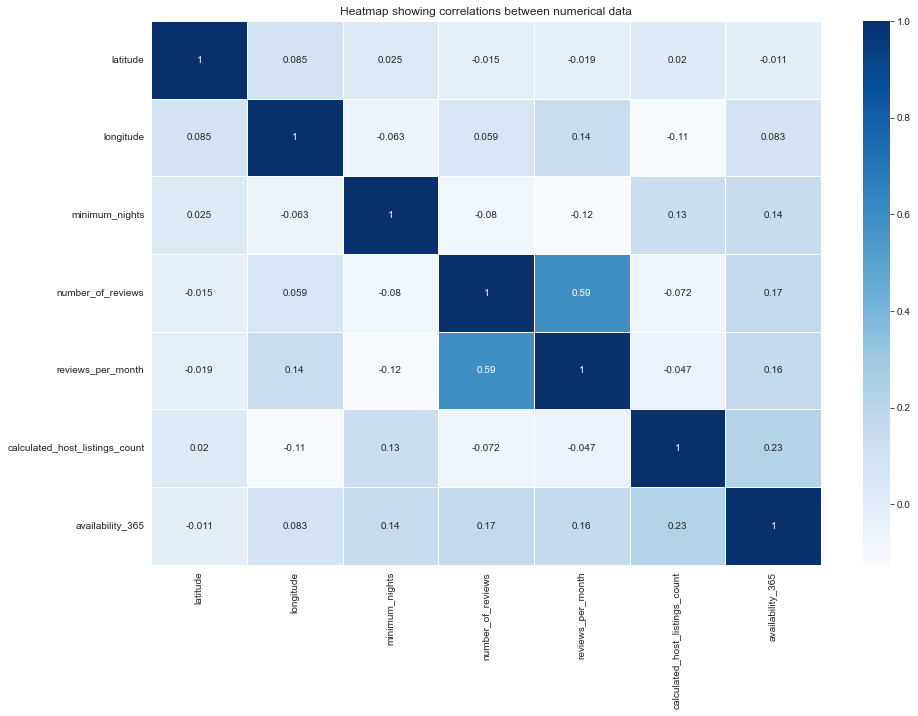

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [35]:
df_numeric.corr().unstack().sort_values(ascending = False)

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
minimum_nights                  minimum_nights                    1.000000
number_of_reviews               number_of_reviews                 1.000000
availability_365                availability_365                  1.000000
number_of_reviews               reviews_per_month                 0.589407
reviews_per_month               number_of_reviews                 0.589407
availability_365                calculated_host_listings_count    0.225701
calculated_host_listings_count  availability_365                  0.225701
availability_365                number_of_reviews                 0.172028
number_of_reviews               availability_365                  0.172028
availability_365         

In [53]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [36]:
# number_of_reviews and reviews_per_month

# Q3
Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
Which of these two variables has bigger score?
Round it to 2 decimal digits using round(score, 2)

In [37]:
from sklearn.metrics import mutual_info_score

In [39]:
cat = ['neighbourhood_group', 'room_type']

In [40]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [45]:
df_mi.round(2)

,MI
room_type,0.14
neighbourhood_group,0.05


In [46]:
# room_type have bigger score

# Q4
- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with
 - these parameters:
  -  model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [47]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
num = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [49]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [51]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [54]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.79


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
features = cat + num
features

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [56]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

neighbourhood_group 0.03992330504141528 0.7500766949585848


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


room_type 0.07683914510686163 0.7131608548931384


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


latitude 0.003927804478985664 0.7860721955210144


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


longitude 0.0040300644237653005 0.7859699355762347


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


minimum_nights 0.005257183761120832 0.7847428162388792


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


number_of_reviews 0.003621024644646753 0.7863789753553533


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


reviews_per_month 0.004745884037222647 0.7852541159627774


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


calculated_host_listings_count 0.0034165047550874794 0.7865834952449126
availability_365 0.008938541773187425 0.7810614582268126


C:\Users\tevfk\anaconda3\envs\mlbook_camp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
df['price']=np.log1p(df['price'])

In [58]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [59]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)


In [60]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [61]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [62]:
del df_train['price']
del df_val['price']
del df_test['price']

# Ridge regression

In [63]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [64]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [66]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(a, round(score, 3))

0 0.497
0.01 0.497
0.1 0.497
1 0.497
10 0.498
